In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix 


In [3]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.shape

(2416, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Exploratory Data Analysis

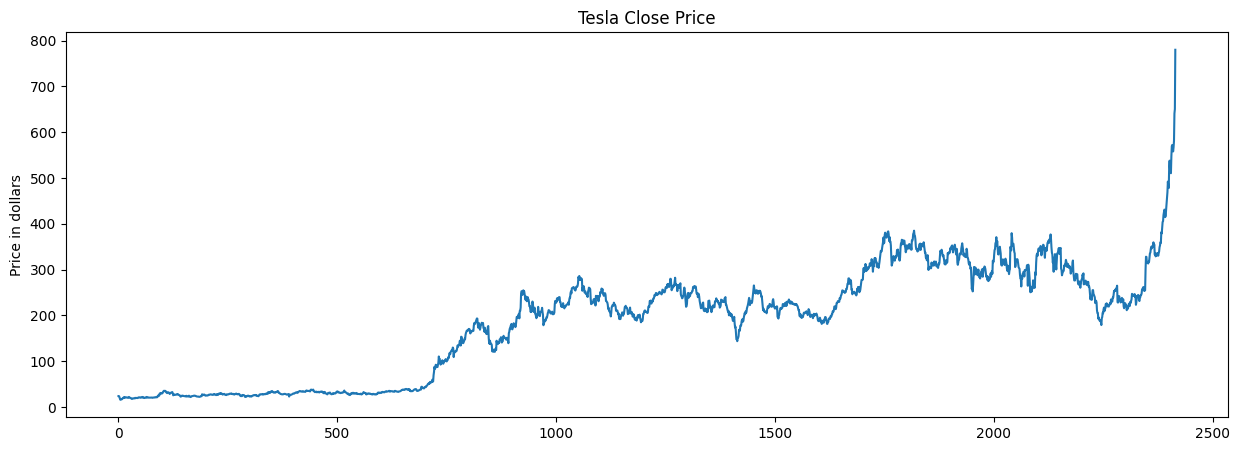

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close Price')
plt.ylabel('Price in dollars')
plt.show()

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [10]:
df = df.drop(['Adj Close'],axis=1)

In [11]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_14208\2738532062.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


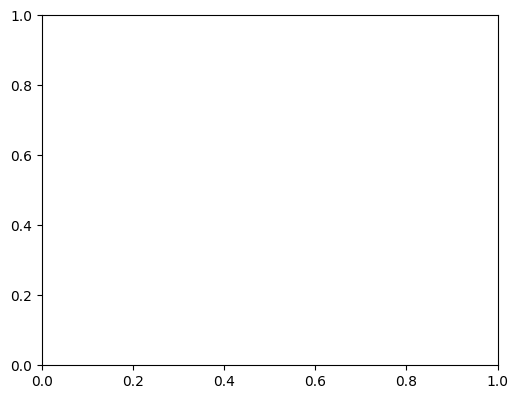

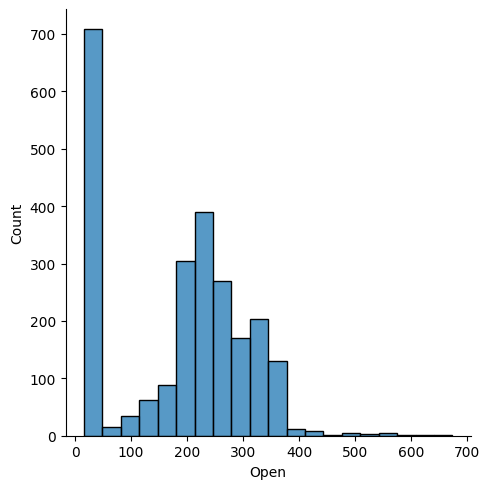

c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


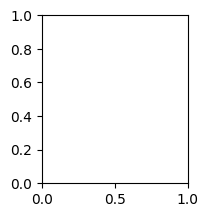

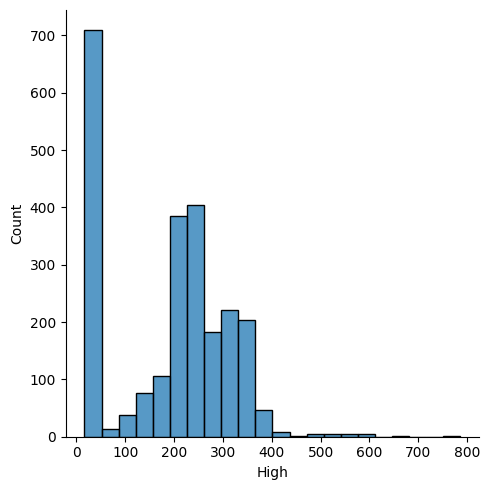

c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


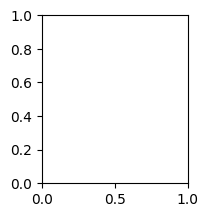

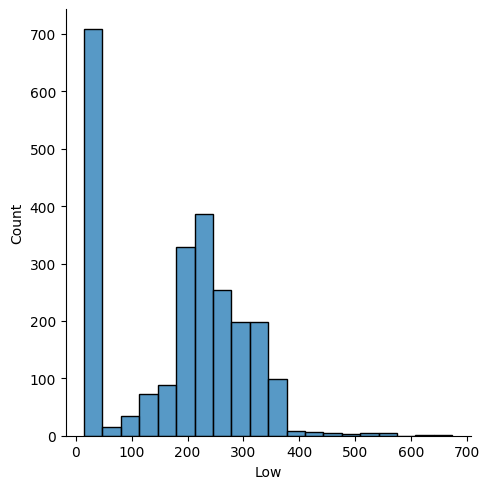

c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


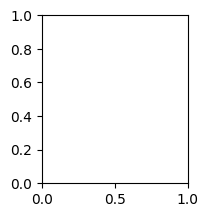

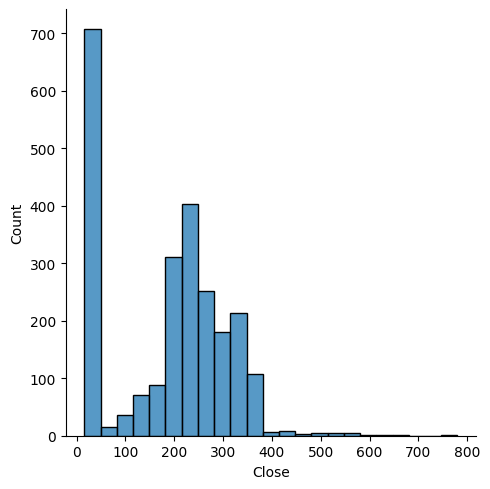

c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


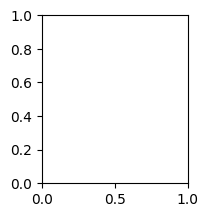

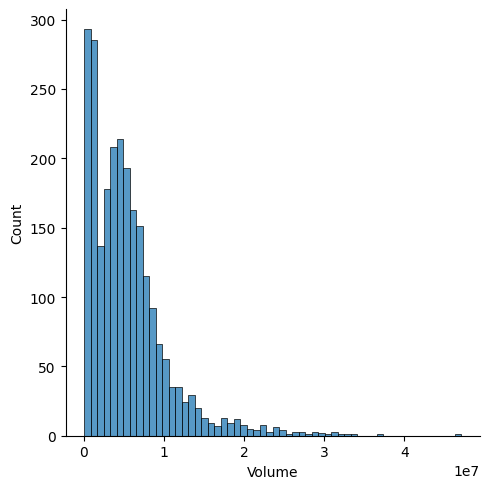

In [12]:
features = ['Open' , 'High' , 'Low' , 'Close' , 'Volume']
plt.subplots(figsize = (20,10))
for i , col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.displot(df[col])
    plt.show()

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_14208\1647026782.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


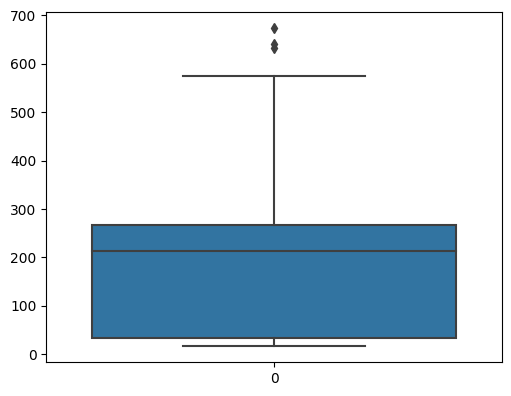

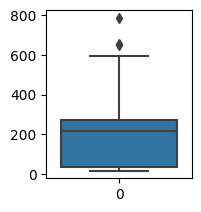

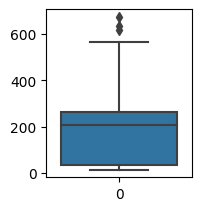

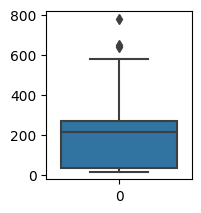

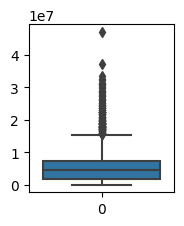

In [13]:
plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()

Feature Engineering

In [14]:


# Use pandas.to_datetime to convert the 'Date' column to a pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, and year separately from the datetime object
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [15]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_14208\470190613.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


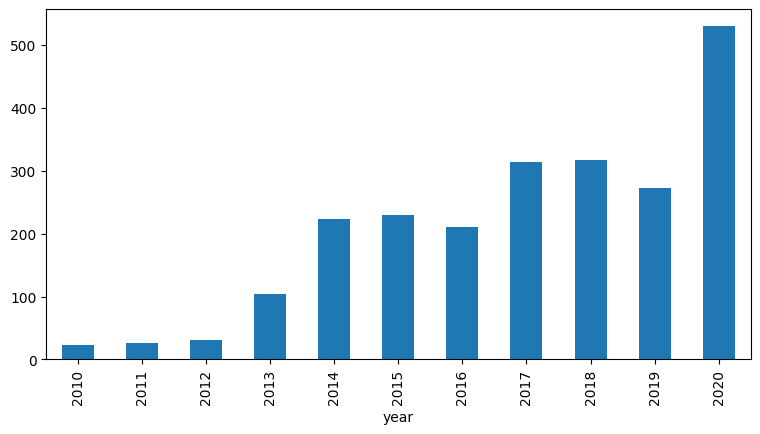

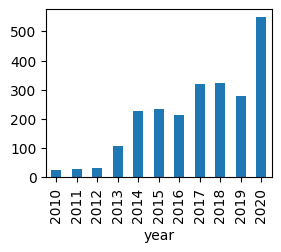

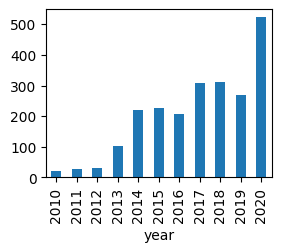

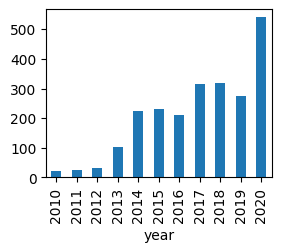

In [16]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize = (20,10))
for i , col in enumerate(['Open','High','Low','Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.show()

In [17]:
df.groupby('is_quarter_end').mean()

,Date,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,2015-04-15 12:01:46.930693120,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,2015-04-15 09:25:12.000000000,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [18]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1)>df['Close'],1,0)


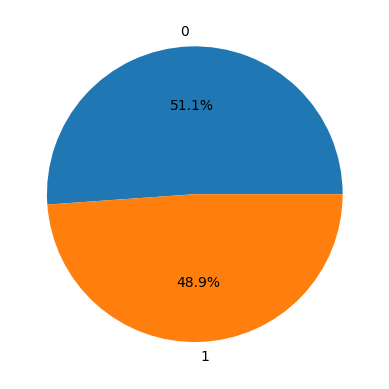

In [19]:
plt.pie(df['target'].value_counts().values,labels=[0,1] , autopct='%1.1f%%')
plt.show()

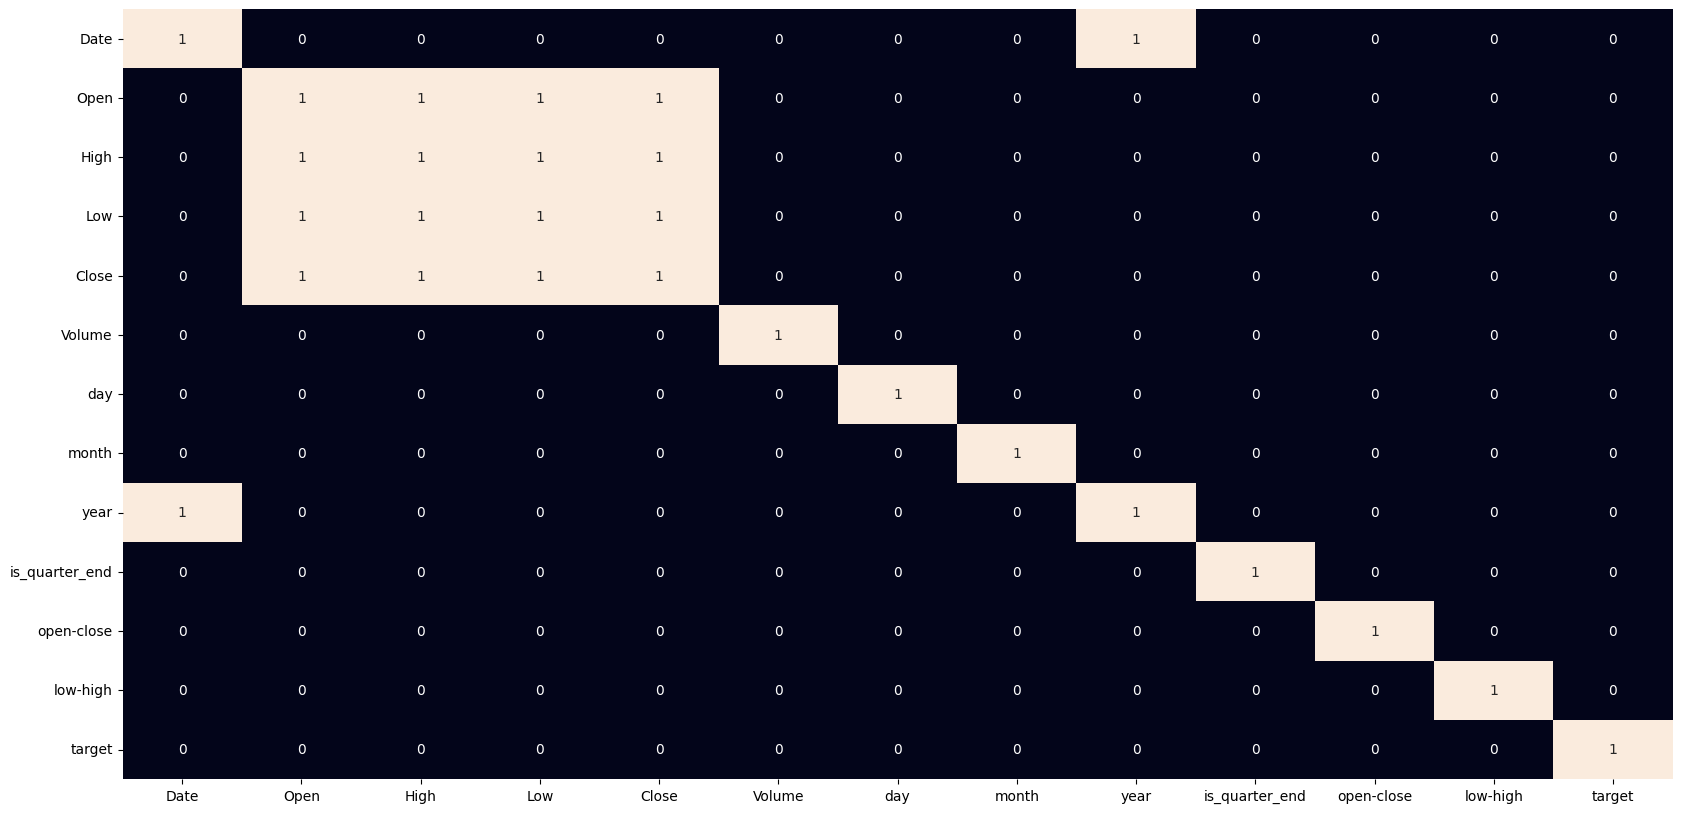

In [20]:
plt.figure(figsize=(20,10))
#As our concern is with the highly correlated features only so , we will visualize our heatmap as per the criteria only
sb.heatmap(df.corr()>0.9,annot=True,cbar=False)
plt.show()

Date Splitting and Normalization

In [21]:
features = df[['open-close','low-high','is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

x_train , x_valid , y_train , y_valid = train_test_split(features , target , test_size=0.1 , random_state=2022)
print(x_train.shape,x_valid.shape)

(2174, 3) (242, 3)


Model Development and Evaluation

In [22]:
models = [LogisticRegression(), SVC(kernel='poly',probability=True),XGBClassifier()]
for i in range(3):
    models[i].fit(x_train,y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ',metrics.roc_auc_score(y_train,models[i].predict_proba(x_train)[:,1]))
    print('Validation Accuracy : ',metrics.roc_auc_score(y_valid,models[i].predict_proba(x_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294572363547078
Validation Accuracy :  0.4625068418171866

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

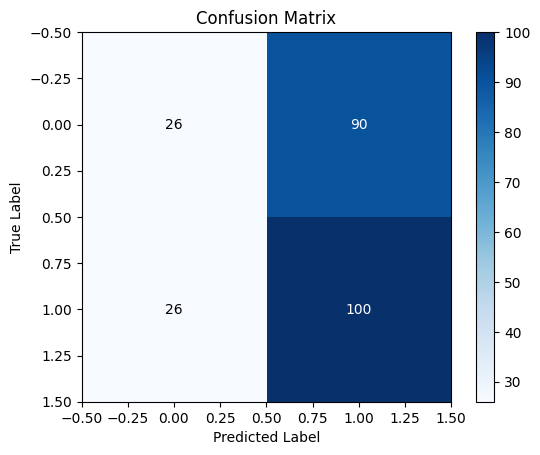

In [23]:
y_pred = models[0].predict(x_valid)
cm = confusion_matrix(y_valid, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotate the plot with the values in the cells
thresh = cm.max() / 2.
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()